In [16]:
import tensorflow as tf 
import numpy as np 

from matplotlib import pyplot as plt 

def fashion_mnist_dataset_func(random_state=None):
    (train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype(
        "float32"
    )
    # train_images = tf.image.resize(train_images, [32,32])
    train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

    # Convert to stacked-mnist(rgb images)
    # t1 = tf.random.shuffle(train_images, seed = 10)
    # t2 = tf.random.shuffle(train_images, seed = 20)
    # train_images = tf.concat([train_images, t1, t2], axis=-1)

    return train_images, train_labels


def mnist_dataset_func(random_state=None):
    (train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype(
        "float32"
    )
    # train_images = tf.image.resize(train_images, [32,32])
    train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

    # Convert to stacked-mnist(rgb images)
    # t1 = tf.random.shuffle(train_images, seed = 10)
    # t2 = tf.random.shuffle(train_images, seed = 20)
    # train_images = tf.concat([train_images, t1, t2], axis=-1)

    return train_images, train_labels


def cifar_dataset_func(random_state=None):
    (train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()

    train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype(
        "int32"
    )
    # train_images = tf.image.resize(train_images, [32,32])
    # train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

    # Convert to stacked-mnist(rgb images)
    # t1 = tf.random.shuffle(train_images, seed = 10)
    # t2 = tf.random.shuffle(train_images, seed = 20)
    # train_images = tf.concat([train_images, t1, t2], axis=-1)

    return train_images, train_labels


def rgb_to_grayscale_np(images):
    # Use the standard grayscale conversion formula
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.float32)[..., np.newaxis]


In [17]:
# Visualize three examples per class in a rotated layout
def plot_images_rotated(images, labels, examples_per_class=3, num_classes=10):
    # Group images by their labels
    grouped_images = {label: [] for label in range(num_classes)}
    for img, lbl in zip(images, labels):
        lbl = int(lbl)  # Ensure label is a scalar
        if len(grouped_images[lbl]) < examples_per_class:
            grouped_images[lbl].append(img)
        if all(len(v) == examples_per_class for v in grouped_images.values()):
            break

    # Prepare a rotated grid for plotting
    plt.figure(figsize=(20, 6))
    for class_idx in range(num_classes):
        for example_idx in range(examples_per_class):
            plt_idx = example_idx * num_classes + class_idx + 1
            plt.subplot(examples_per_class, num_classes, plt_idx)
            plt.imshow(grouped_images[class_idx][example_idx].squeeze(), cmap="gray")
            if example_idx == 0:
                plt.title(f"Class {class_idx}")
            plt.axis("off")
    plt.tight_layout()
    plt.show()
    

In [27]:
fashion_images, fashion_labels = fashion_mnist_dataset_func()
mnist_images, mnist_labels = mnist_dataset_func()
cifar_images, cifar_labels = cifar_dataset_func()


In [28]:
cifar_greyscale_images = rgb_to_grayscale_np(cifar_images)

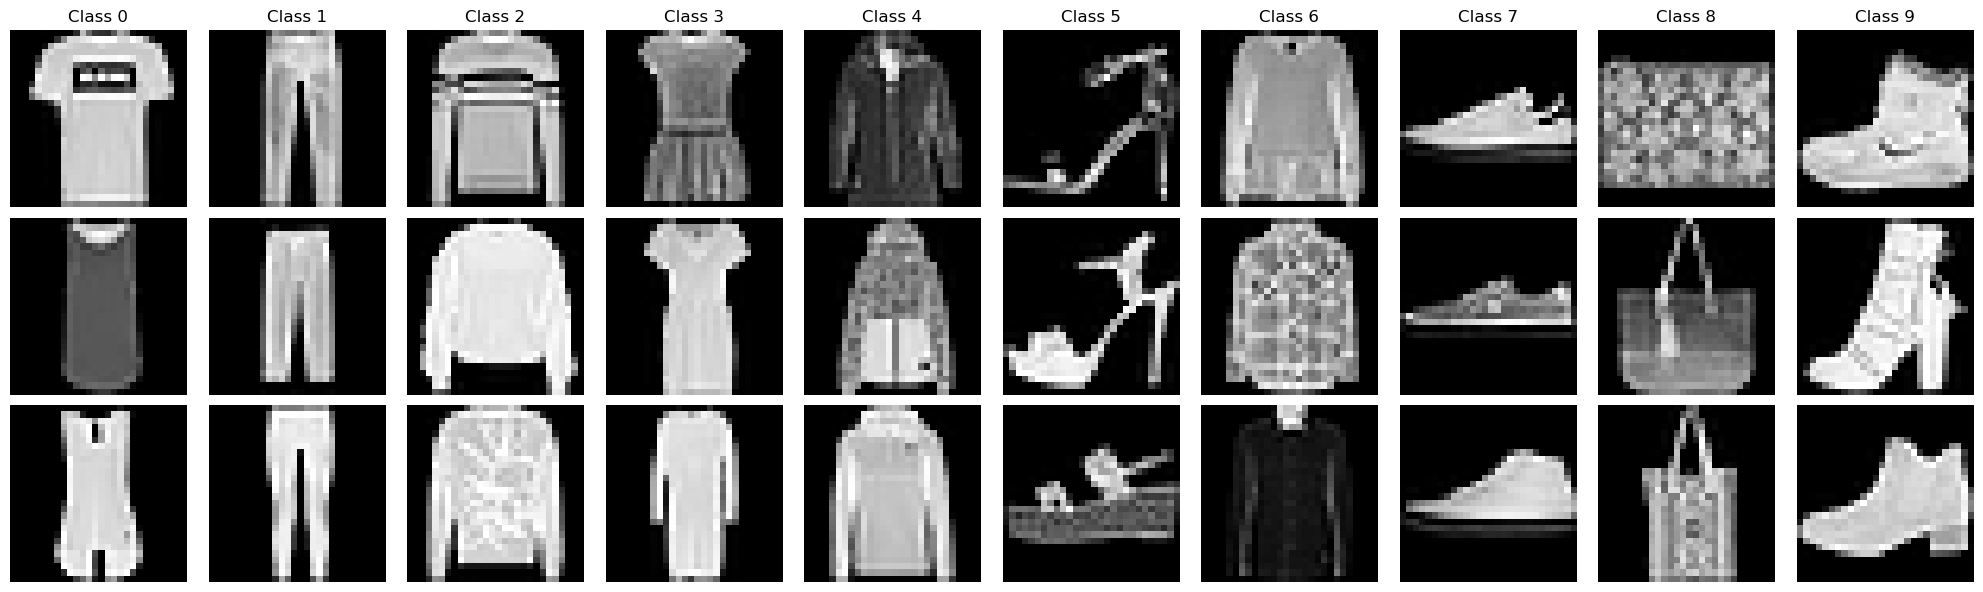

In [24]:
plot_images_rotated(fashion_images, fashion_labels)

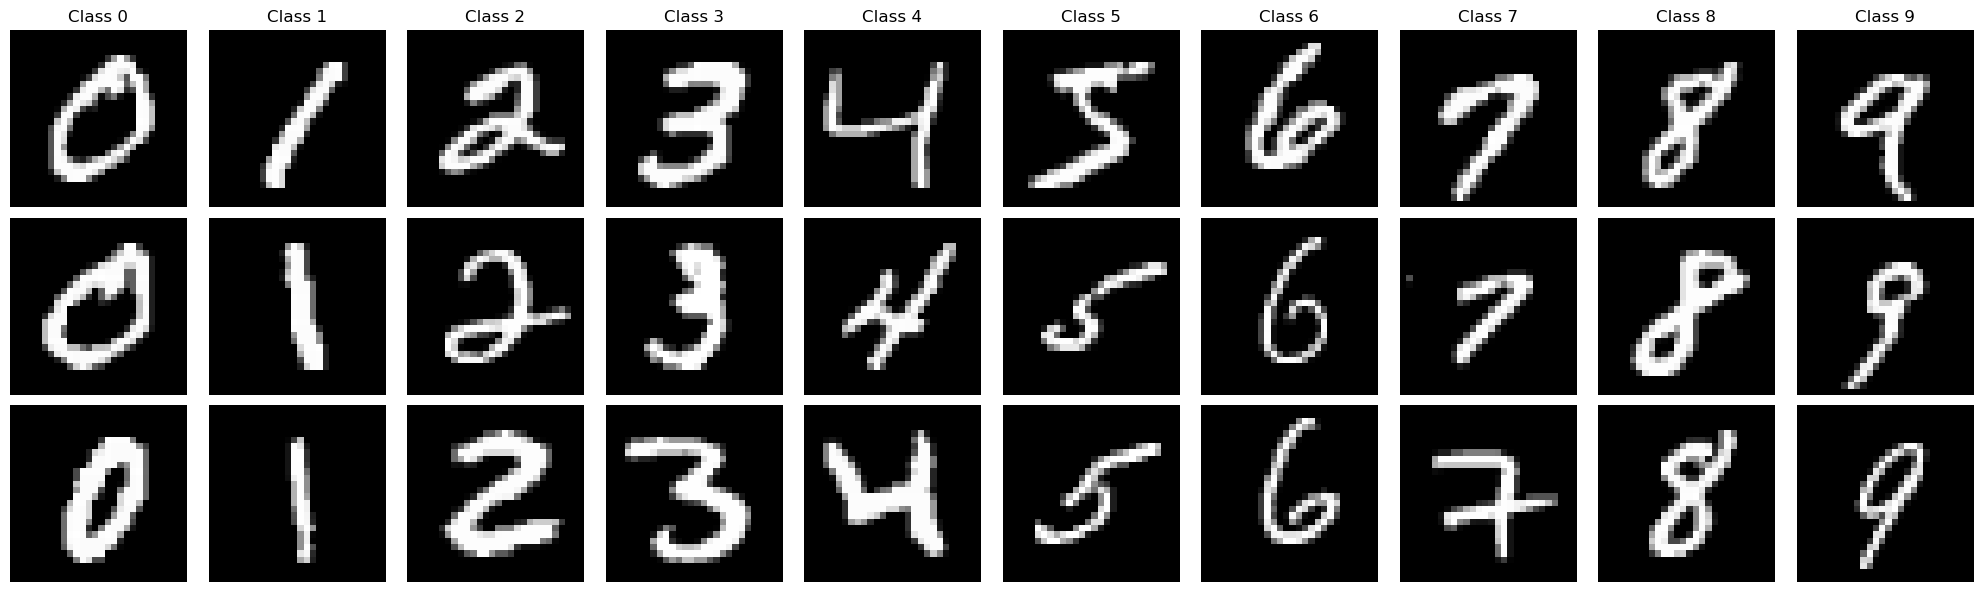

In [25]:
plot_images_rotated(mnist_images, mnist_labels)

In [ ]:
plot_images_rotated(cifar_images, cifar_labels)

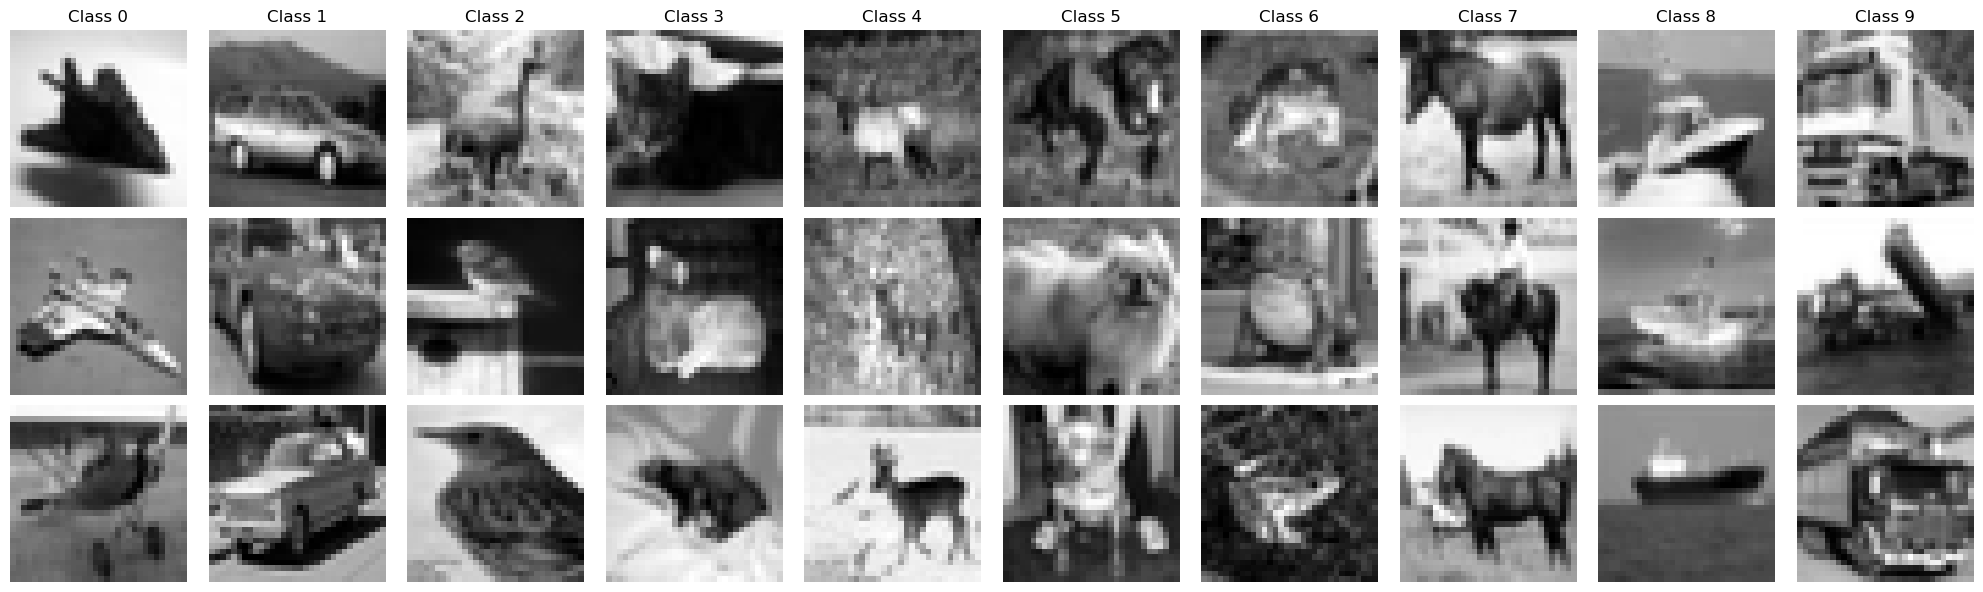

In [26]:
plot_images_rotated(cifar_greyscale_images, cifar_labels)